# Project: Investigate a Dataset - [TMDB-movies]
## Table of Contents
<ul>
<li><a href="#intriduceMe">Introduction</a></li>
<li><a href="#playWithData">Data Wrangling</a></li>
<li><a href="#analyseData">Exploratory Data Analysis</a></li>
<li><a href="#whathappened">Conclusions</a></li>

<a id='introduceMe'></a>
## Introduction

>### Dataset Description

>> For my Data Analysis Project, I will be working on the 'tmdb-movies' dataset. I chose this dataset because I am a huge fan of hollywood movies. This dataset contains more than ten thousand movies and contains valuable information about those movies including budget, revenue, and profit.

> ### My questions for Analysis

>> I will seek to answer the following questions with my Analysis today:
 <li> <a href="#profitLoss"> Which movie was the most and least profitable? </a></li>
 <li> <a href="#runtime"> Which movie had the longest and the shortest runtime? </a></li>
 <li> <a href="#budget"> Which movie had the highest and the lowest budget? </a></li>
 <li> <a href="#timeline">  Which movie was released the latest and the earliest? </a></li>
 
>> I will also analyze the genre for successful movies and determine if directors have influence over profitability of the movies with visualizations.

In [888]:
# This cell is used to set up import statements for all of the packages that I plan to use for my analysis.

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

file:///Users/sovitkhanal/Library/Jupyter/runtime/jpserver-1381-open.html
## Data Wrangling

In this section of the report, I will load the csv file dataset. I will also check for cleanliness of the data. Then I will trim and clean the dataset for analysis.

### Data Load

In [889]:
df = pd.read_csv('tmdb-movies.csv')    #Load the data and store it in 'df'

#### Display the total number of rows and columns in the dataset

In [890]:
df.shape          #Display the total number of rows and columns in the dataset

(10866, 21)

#### Display the first five rows from the dataset

In [891]:
df.head(5)                             #Display the contents of the first five rows

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### Display the last five rows from the dataset

In [892]:
df.tail(5)             #Display the contents of the last five rows

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


## Data Cleaning

In this section I will perform data cleanup. I will display the data types, ensure the data type matches with what is shown. I will remove the duplicates, change the data types if required and also remove unnecessary data. 

### Display Data Types

In [893]:
df.info()          #Display data types and check for to see if it needs to be cleaned

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Duplicate values (will be removed in the Data Cleanup Step)

In [894]:
sum(df.duplicated())          #check if the data has duplicate records and print the number of duplicate records

1

### Investigate data type for release_date column (because it is listed as 'Object')

In [895]:
print (type(df['release_date'][0])) #display the data type for release_date
if type(df['release_date'][0])!=object:
        print ("Hmmm...Interesting Find! The data type for release_date is not 'Object'.")

<class 'str'>
Hmmm...Interesting Find! The data type for release_date is not 'Object'.


### Other observations from the data set

No unit of currency is mentioned, we will assume it is US Dollar for our analysis.

### Steps for Data Cleanup
<li>Remove unnecessary columns. The columns we will remove are:
    id, imdb_id, popularity, budget_adj, revenue_adj, homepage, production_company,, keywords, overview,     
    production_companies, vote_count, vote_average) </li>
<li>Change the data type of release_date column to proper date format</li>
<li>Remove duplicate values</li>
<li>Replace 0 with NaN in the runtime, budget and revenue columns</li>
<li>Update the format of budget and revenue columns</li>

### Remove unnecessary columns

In [896]:
toDelete = [ 'id', 'imdb_id', 'budget_adj', 'revenue_adj', 'homepage', 
           'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']   #creates a list of columns

df = df.drop(toDelete, axis=1)       #Deletes the list with the columns

In [897]:
df.head(5)       #Display the first 3 rows of the new dataset

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015


### Change the data type of release_date column to proper date format and then display the data

In [898]:
df.release_date = pd.to_datetime(df['release_date'])      #Changes the data type of release_date column
df.head(5)     # Displays the new dataset with the data type updated

,popularity,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,2015-03-18,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,2015-04-01,2015


### Remove duplicate values

In [899]:
df.drop_duplicates(keep ='first', inplace=True)

In [900]:
rows, col = df.shape

print('{} total entries remain in the dataset after removing the duplicates.'.format(rows, col))

10865 total entries remain in the dataset after removing the duplicates.


### Replace 0 with NaN in the runtime, budget and revenue columns (to make it consistent; NaN = Not a Number)

In [901]:
newList=['runtime', 'budget', 'revenue']     #Create list of runtime, budget, revenue columns

df[newList] = df[newList].replace(0, np.NAN)     #Replace '0' with NAN in the list

df.dropna(subset = newList, inplace = True)     #Delete all rows with NaN value

### Update the format of budget and revenue columns

In [902]:
newType=['budget', 'revenue']     #Creates a list of budget and revenue  columns

df[newType]=df[newType].applymap(np.int64)     #Changes the data type of the new list

df.dtypes     #Displays the columns and the data type

popularity               float64
budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
tagline                   object
runtime                  float64
genres                    object
release_date      datetime64[ns]
release_year               int64
dtype: object

## Exploratory Data Analysis

#### Because we want to calculate the profit, we need to calculate it based on the tota lbudget and revenue

In [903]:
df.insert(2,'profit',df['revenue']-df['budget'])   #Insert a new column called 'Profit'. Calculate 'Profit' as a difference of 'Budget' and 'Revenue'
df.head(2)     #Display the new dataset

,popularity,budget,profit,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,32.985763,150000000,1363528810,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
1,28.419936,150000000,228436354,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015


#### For our analysis, we will create a function that will be used to calculate the high-low values

In [904]:
import pprint

def highLow(column):       #Create and deifne the function

    high = df[column].idxmax()     #Highest value in the dataset
    detailedHigh = pd.DataFrame(df.loc[high])
    
    low = df[column].idxmin()      #Loswet value in the dataset
    detailedLow = pd.DataFrame(df.loc[low])
    
    details= pd.concat([detailedHigh, detailedLow], axis=1)     #Combining the records
    
    return details

<a id='profitLoss'></a>
#### Research Question 1: Which movie made the highest and the lowest profit? 

In [905]:
highLow('profit')     #Calling the highLow functtion to retrieve highest and lowest profitable movies

,1386,2244
popularity,9.432768,0.25054
budget,237000000,425000000
profit,2544505847,-413912431
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
tagline,Enter the World of Pandora.,Assassin. Hero. Legend.
runtime,162.0,100.0
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller


#### From the above analysis we can conclude the following about the most and least profitable movies:
> <li>The most profitable movie was 'Avatar' released in 2009 with a profit of \$254.5M.</li>
> <li>The least profitable movie was 'The Warrior's Way' release in 2010 with a profit of -$413M. </li>

<a id='runtime'></a>
#### Research Question 2: Which movie had the longest and the shortest runtime? 

In [906]:
highLow('runtime')     #Calling the highLow function to retrieve movies with longest and shortest runtime

,2107,5162
popularity,0.534192,0.208637
budget,18000000,10
profit,-17128721,-5
revenue,871279,5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
tagline,The man who hijacked the world,NaN
runtime,338.0,15.0
genres,Crime|Drama|Thriller|History,Science Fiction|Animation


#### From the above analysis we can conclude the following about the movies with the longest and the shortest runtimes:
> <li>The longest movie was 'Carlos' released in 2010 with a runtime of 338 minutes.</li>
> <li>The shortest movie was 'Kid's Story' released in 2003 with a runtime of 15 minutes. </li>

<a id='budget'></a>
#### Research Question 3: Which movie had the highest and the lowest budget?

In [907]:
highLow('budget')     #Calling the highLow function to retrieve the highest and the lowest budgeted movies

,2244,2618
popularity,0.25054,0.090186
budget,425000000,1
profit,-413912431,99
revenue,11087569,100
original_title,The Warrior's Way,Lost & Found
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
director,Sngmoo Lee,Jeff Pollack
tagline,Assassin. Hero. Legend.,A comedy about a guy who would do anything to ...
runtime,100.0,95.0
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance


#### From the above analysis we can conclude the following about the movies with the highest and the lowest budget:
> <li>The movie with the highest budget was 'The Warrior's Way' which made a total profit of -\$413M.</li>
> <li>The movie with the lowest budget was 'Lost & Found' which made a total profit of $99.</li>

<a id='timeline'></a>
#### Research Question 4: Which movie was released the latest and the earliest? 

In [908]:
highLow('release_year')     #Calling the highLow function to retrieve the earliest and the latest release year

,0,10141
popularity,32.985763,2.610362
budget,150000000,806948
profit,1363528810,31193052
revenue,1513528810,32000000
original_title,Jurassic World,Psycho
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Anthony Perkins|Vera Miles|John Gavin|Janet Le...
director,Colin Trevorrow,Alfred Hitchcock
tagline,The park is open.,The master of suspense moves his cameras into ...
runtime,124.0,109.0
genres,Action|Adventure|Science Fiction|Thriller,Drama|Horror|Thriller


#### From the above analysis we can conclude the following about the movies with the earliest and the latest release date
> <li>The latest movie released was 'Jurassic World'. The actual release date was June 9, 2015. </li>
> <li>The earliest movie released was 'Psycho'. The actual release date was August 14, 1960.</li>

## Visualizations

#### For the visualization, I will be plotting a histogram of the runtime of movies. This is helpful in figuring average runtime of the movies

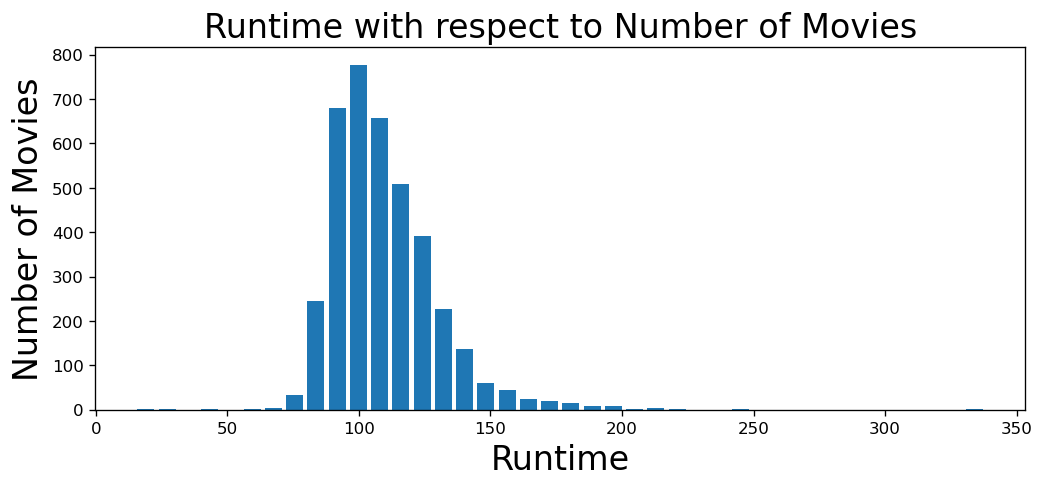

In [909]:
plt.figure(figsize=(10,4), dpi = 60)     #Indicates the width and height of the Histogram 

plt.xlabel('Runtime', fontsize = 20)     #Information for the X-axis

plt.ylabel('Number of Movies', fontsize=20)     #Information for the Y-axis

plt.title('Runtime with respect to Number of Movies', fontsize=20)     #Name of the Histogram

plt.hist(df['runtime'], rwidth = 0.8, bins = 40)     #Plot for the Histogram

plt.show()     #Display the Histogram

### Runtime Analysis

In [910]:
df['runtime'].describe()    #Displays the runtime details

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

#### Further exploration indicates that: 
<ul> 25% of the movies have runtime of about 95 minutes</ul>
<ul> 75% of movies have runtime of about 119 minutes</ul>

### Most Profitable Year

In [911]:
profitYear = df.groupby('release_year')['profit'].sum()     #Find the most profitable year
print('The most profitable year was {}.'.format(profitYear.idxmax()))  #Display the most profitable Year

The most profitable year was 2015.


### Movies with profit over $100M

In [912]:
profits = df[df['profit'] >= 100000000]     #Only retrieve movies that had a profit of >$100M

profits.index = range(len(profits))
profits.index = profits.index + 1     #re-index

profits.head(5)     #Display the new list (top 5)

,popularity,budget,profit,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
1,32.985763,150000000,1363528810,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015
2,28.419936,150000000,228436354,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015
3,13.112507,110000000,185238201,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2015
4,11.173104,200000000,1868178225,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015
5,9.335014,190000000,1316249360,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137.0,Action|Crime|Thriller,2015-04-01,2015


In [913]:
print('There are a total of {} movies with profit over $100M.'.format(len(profits))) # Display the total number of movies with profit >$100M

There are a total of 826 movies with profit over $100M.


### Function to take any column as argument and display results

In [914]:
def anyColumn(column):     #Create a new function that takes any column as argument and display results
    anyColumn = profits[column].str.cat(sep = '|')     #separate the string from the column with '|'
    
    anyColumn = pd.Series(anyColumn.split('|'))     #store values separately in a series
    
    total = anyColumn.value_counts(ascending = False)     #arrange values in descending order
    
    return total

### Display number of profitable movies by Genre

In [915]:
myVals = anyColumn('genres')     #store returned value in a variable

myVals.head()     #Display the count of top 5 values

Action       317
Comedy       299
Adventure    278
Drama        264
Thriller     233
dtype: int64

### Most frequent Genres in a visual format

The most frequently used genre is Action followed by Comedy. This can be depicted in a pie chart below.

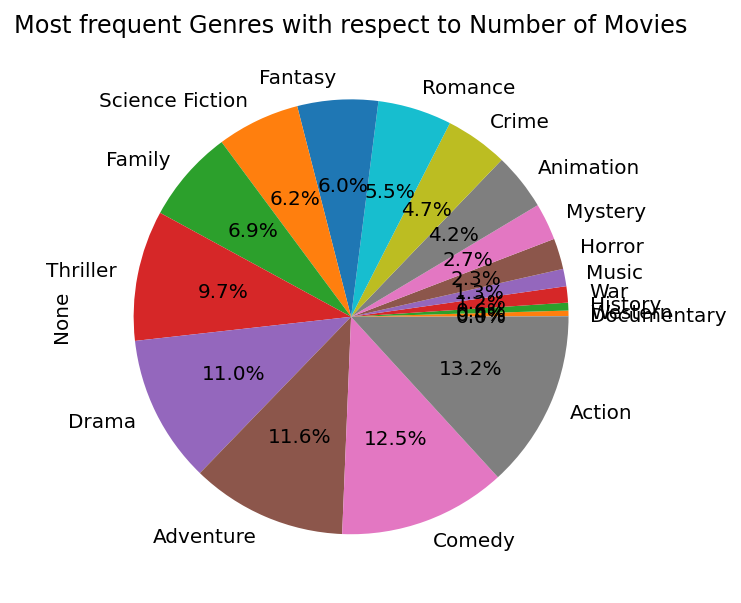

In [916]:
myVals.sort_values(ascending = True, inplace = True)     #Plotting the points in descending order

pt = myVals.plot(kind="pie",autopct="%1.1f%%")  #Plotting

pt.set(title = 'Most frequent Genres with respect to Number of Movies')     #Give our chart a title

pt.figure.set_size_inches(10, 5)     #Size of the chart

### Number of profitable movies by Director

In [935]:
myVals = anyColumn('director')
myVals.head()

Steven Spielberg      22
Robert Zemeckis       10
Michael Bay            8
Tim Burton             7
M. Night Shyamalan     7
dtype: int64

Steven Spielberg was one of the most successful directors. From the data that we gathered, we can conclude that movies directed by Steven make profits greater than $100M and the director does have influence over profitability. 

### Does a higher budget movie end being popular than a low budget movie?

Text(0.5, 1.0, 'Budget Vs Popularity')

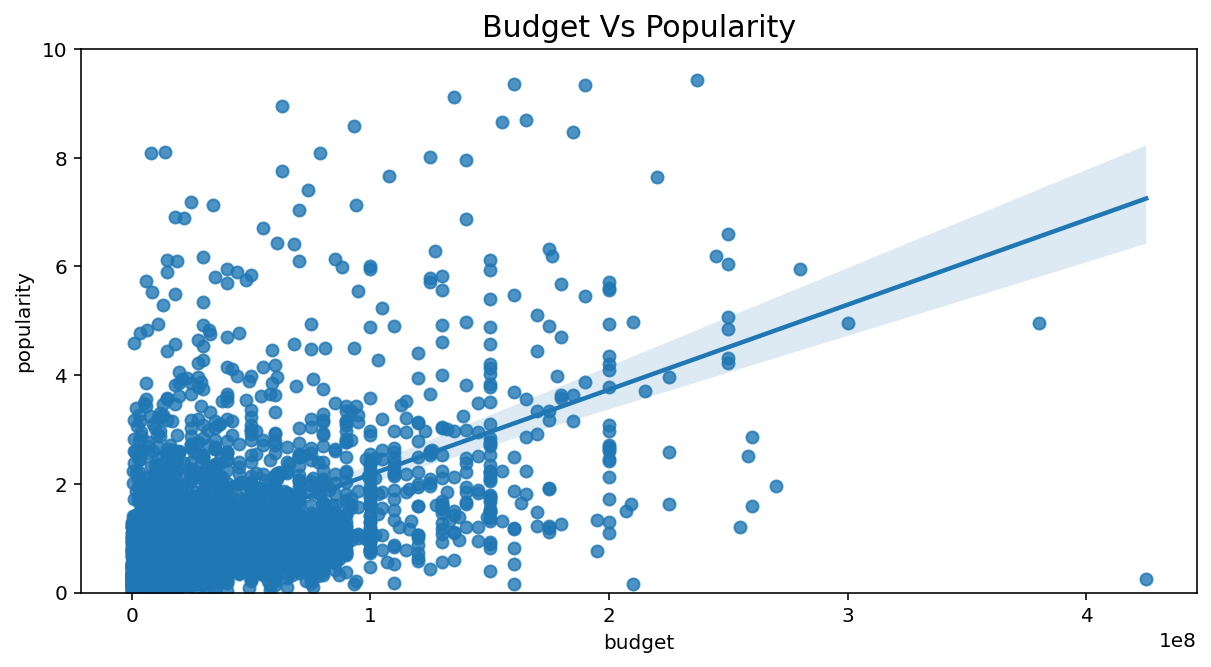

In [1045]:
# Scatter plot for two variables
f, ax = plt.subplots(figsize=(10,5))
ax.set(ylim=(0, 10))
sns.regplot(x=df["budget"],y=df["popularity"]).set_title("Budget Vs Popularity",size=15)

It is safe to assume that higher budgeted movie do tend to be more popular. 

## Conclusions

After this analysis it can be implied that: 
 1. Average budget for a successful movie should be around $60M
 2. Average duration for a profitable movie should be around 115 minutes 
 3. The most profitable movie belongs to the genre 'Action'
 4. Over time, movies become profitable (as the most number of profitable movies were created in 2015 - the latest year from the dataset)
 5. The ability to produce the most successful and profitable movies depend on the director of the movie

### Limitations
<li>This analysis was based on the provided dataset that didn't include currency information. If the currency for the data is not all USD, our analysis might be proven wrong. </li>
<li>A lot of rows with missing information were dropped as well. There is an inconsistency in the data that may severly skew the analysis.</li>
<li> Duplicate records will affect the decisions.</li>
<li> Data entered in the dataset could be entered as an incorrect data type and that will influence our ability to make informed decisions using the data</li>